# VAED Dataset Exploratory Data Visualization
## 1. Introduction
Exploratory data visualizarion, or exploratory data analysis (EDA), is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. This report will build visualizations on the cleaned dataset, namely `diag_clean`, `proc_clean`, and `epis_clean` in order to discover the descriptive characteristics of the dataset. Firstly, the univariate exploration will be used to discover the pattern of each variable concerned. Secondly, the bivariate exploration will be used to discover the relationship between two variables. Because of the dataset difficulty, multivariate exploration will not be used in this report.

In [1]:
# import all packages and set plots in line
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
# read all datasets
diag = pd.read_csv('diag_clean.csv')
proc = pd.read_csv('proc_clean.csv')
epis = pd.read_csv('episode_clean.csv')

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
diag.head()

,USI,UNIQUE_KEY,SEX,FIS_YEAR,DIAG_STAGE,DIAG_CD
0,98,6447017,2,13/14,1,PF445
1,98,6554513,2,13/14,1,PJ22
2,112,6518907,2,13/14,1,PD125
3,131,6489769,2,13/14,1,PE269
4,156,6385291,2,13/14,1,PE1173


In [4]:
proc.head()

,USI,UNIQUE_KEY,SEX,FIS_YEAR,PROC_START_DT,PROC_STAGE,PROC_CD
0,112,6518907,2,13/14,2014-03-27,1,3209300
1,156,6387322,2,13/14,2013-07-08,1,9066500
2,156,6399365,2,13/14,2013-08-26,1,9066500
3,156,6409153,2,13/14,2013-10-21,1,3002300
4,156,6457995,2,13/14,2013-12-03,1,4436702


In [5]:
epis.head()

,USI,UNIQUE_KEY,SEX,DATE_OF_BIRTH,ADM_DT,SEP_DT,CARE_TYP,ADM_TYP,ADM_SRC,FIS_YEAR
0,98,6447017,2,1962-04-07,2013-11-11,2013-11-15,4,L,H,13/14
1,98,6554513,2,1962-04-07,2014-06-27,2014-06-27,4,C,H,13/14
2,112,6518907,2,1939-03-08,2014-03-27,2014-03-27,4,L,H,13/14
3,131,6489769,2,1948-10-20,2014-02-11,2014-02-11,4,L,H,13/14
4,156,6387322,2,1951-05-01,2013-07-07,2013-08-11,4,X,H,13/14


## 2. Univariate Exploration
### 2.1 Proportion of `SEX`
I'll start by looking at the proportion of `SEX` among all patients. Let's create a DataFrame named `patient` to help our calculation.

In [6]:
# create a dataframe called 'patient'
patient = diag[['USI', 'SEX']]
patient.drop_duplicates(inplace=True)
patient.reset_index(drop=True, inplace=True)
patient.head()

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,USI,SEX
0,98,2
1,112,2
2,131,2
3,156,2
4,159,2


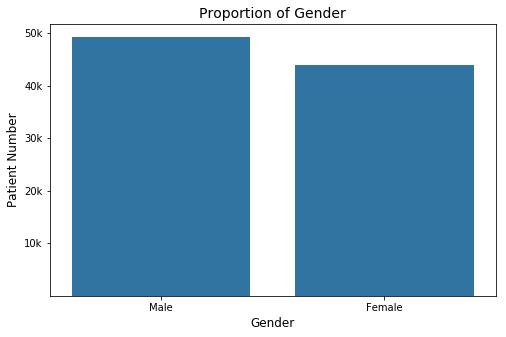

In [7]:
# create the plot of 'SEX'
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(data=patient, x='SEX', color=base_color)
plt.xticks([0, 1], ['Male', 'Female'])
plt.yticks([1e4, 2e4, 3e4, 4e4, 5e4], ['10k', '20k', '30k', '40k', '50k'])
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Patient Number', fontsize=12)
plt.title('Proportion of Gender', fontsize=14);

Among all patients within the dataset, the number of male and female does not have many differences. The number of male patients is slightly below 50,000, while the number of female patients is slightly below 45,000. There are no records with regard to other genders.

### 2.2 Trend in `FIS_YEAR`

Now, let's take a look at `FIS_YEAR` - how the number of patients and admissions changed throughout the fiscal year. Let's create another DataFrame callled `adm` to help our calculation.

In [8]:
# create a dataframe called 'patient_fis'
patient_fis = diag[['USI', 'FIS_YEAR']]
patient_fis.drop_duplicates(inplace=True)
patient_fis.reset_index(drop=True, inplace=True)

# create a dataframe called 'adm_fis'
adm_fis = diag[['UNIQUE_KEY', 'FIS_YEAR']]
adm_fis.drop_duplicates(inplace=True)
adm_fis.reset_index(drop=True, inplace=True)

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


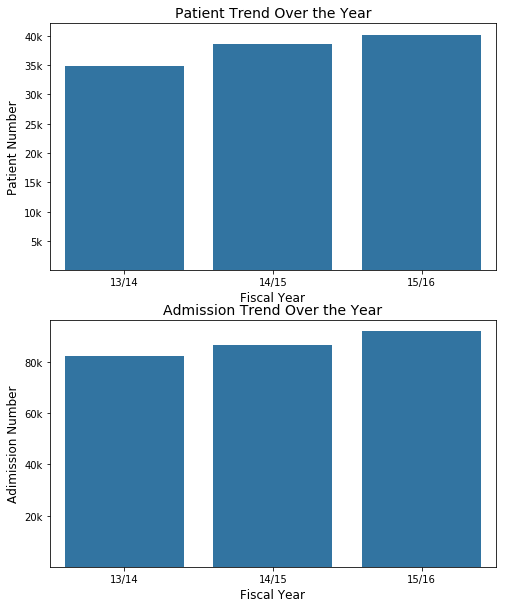

In [9]:
# create the plot of 'FIS_YEAR'
plt.figure(figsize=[8, 10])
plt.subplot(2, 1, 1)
base_color = sns.color_palette()[0]
sns.countplot(data=patient_fis, x='FIS_YEAR', color=base_color)
plt.yticks([5e3, 1e4, 1.5e4, 2e4, 2.5e4, 3e4, 3.5e4, 4e4], ['5k', '10k', '15k', '20k', '25k', '30k', '35k', '40k'])
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Patient Number', fontsize=12)
plt.title('Patient Trend Over the Year', fontsize=14)

plt.subplot(2, 1, 2)
sns.countplot(data=adm_fis, x='FIS_YEAR', color=base_color)
plt.yticks([2e4, 4e4, 6e4, 8e4], ['20k', '40k', '60k', '80k'])
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Adimission Number', fontsize=12)
plt.title('Admission Trend Over the Year', fontsize=14);

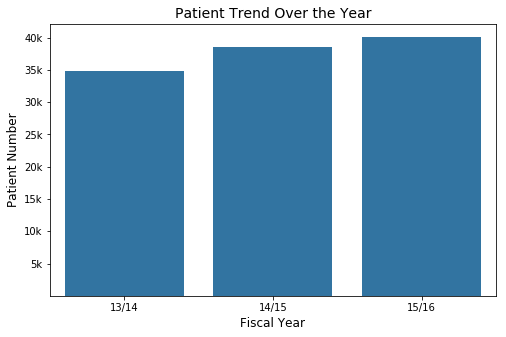

In [10]:
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(data=patient_fis, x='FIS_YEAR', color=base_color)
plt.yticks([5e3, 1e4, 1.5e4, 2e4, 2.5e4, 3e4, 3.5e4, 4e4], ['5k', '10k', '15k', '20k', '25k', '30k', '35k', '40k'])
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Patient Number', fontsize=12)
plt.title('Patient Trend Over the Year', fontsize=14);

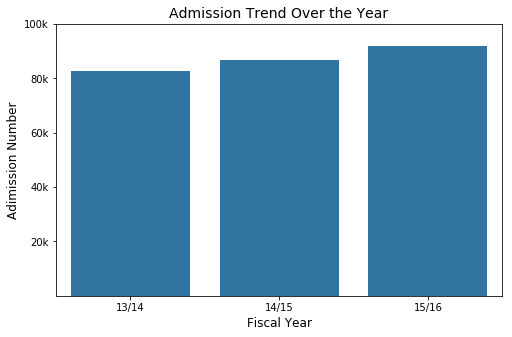

In [11]:
plt.figure(figsize=[8, 5])
sns.countplot(data=adm_fis, x='FIS_YEAR', color=base_color)
plt.yticks([2e4, 4e4, 6e4, 8e4, 10e4], ['20k', '40k', '60k', '80k', '100k'])
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Adimission Number', fontsize=12)
plt.title('Admission Trend Over the Year', fontsize=14);

From 2013 to 2016, there is a steady increase in the number of both cancer patients and admissions. 

### 2.3 Cancer Proportion From `DIAG_CD_01`
Now Let's take a look at what the proportion of cancer is among patients. In order to solve this question, we need to calculate the frequency of cancer based on patients, that is, if one patient is diagnosed with a cancer in two admissions, we only calculate the frequency once. Then, we plot the proportion with each cancer type followed by `P`, that is, the cancer that patient got before admission into the hospital. We only care about the cancer type from `DIAG_CD_01` because this is the major cancer diagnosis that we concern. Also, since there are so many cancer types, we only care about the top-20 most frequent cancer type.

In [12]:
# create a new dataframe named 'cancer'
cancer = diag.query('DIAG_STAGE == 1')[['USI', 'DIAG_CD']]
cancer.DIAG_CD = cancer.DIAG_CD.str[2:]
cancer.drop_duplicates(inplace=True)
cancer.head()

,USI,DIAG_CD
0,98,F445
1,98,J22
2,112,D125
3,131,E269
4,156,E1173


In order to illustrate the name of each cancer type, we need to map the `DIAG_CD` with the name of cancer. 

In [13]:
# read diagnosis mapping table
diag_map = pd.read_csv('DIAG_ICD10.csv')[['CODE_ID', 'ASCII_SHORT_DESC']]
diag_map.rename(columns={'CODE_ID': 'DIAG_CD'}, inplace=True)
diag_map.head()

,DIAG_CD,ASCII_SHORT_DESC
0,A00,Cholera
1,A001,Cholera dt biovar eltor
2,A01,Typhoid and paratyphoid fevers
3,A011,Paratyphoid fever A
4,A013,Paratyphoid fever C


In [14]:
# combine these two datasets into a new one
cancer_name = cancer.merge(diag_map, on='DIAG_CD')
cancer_name.head()

,USI,DIAG_CD,ASCII_SHORT_DESC
0,98,F445,Dissociative convulsions
1,13390,F445,Dissociative convulsions
2,13397,F445,Dissociative convulsions
3,22736,F445,Dissociative convulsions
4,52318,F445,Dissociative convulsions


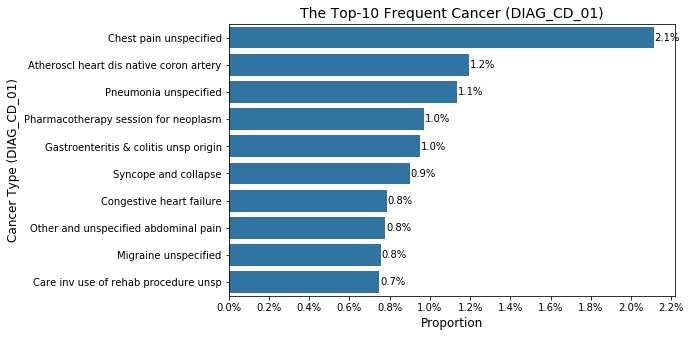

In [15]:
# set the preliminary parameters for the plot
cancer_count = cancer_name.ASCII_SHORT_DESC.value_counts()
cancer_order = cancer_count.index
cancer_total = cancer_name.shape[0]
cancer_max = cancer_count[0]
cancer_max_prop = cancer_max / cancer_total

# set the ticks for the plot
tick_props = np.arange(0, cancer_max_prop+0.001, 0.002)
tick_names = ['{:0.1f}%'.format(v*100) for v in tick_props]

# creat the bar chart for the top 20 cancer
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
top_10_cancer_order = cancer_order[0:10]

sns.countplot(data=cancer_name, y='ASCII_SHORT_DESC', color=base_color, order=top_10_cancer_order)
plt.xticks(tick_props*cancer_total, tick_names)
plt.title('The Top-10 Frequent Cancer (DIAG_CD_01)', fontsize=14)
plt.xlabel('Proportion', fontsize=12)
plt.ylabel('Cancer Type (DIAG_CD_01)', fontsize=12);

# add percentage text to each cancer
for i in range(10):
    count = cancer_count[i]
    pct_string = '{:0.1f}%'.format(count*100/cancer_total)
    plt.text(count+5, i, pct_string, va='center')

plt.show()

From the above result, the `Chest pain unspecified` occurred as nearly twice as `Atheroscl heart dis native coron artery`, becoming the most frequent cancer in this dataset. The proportion of other cancer types does not have huge differences.

### 2.4 Procedure Proportion From `PROC_CD_01`
The principle of calculating procedure proportion is the same as above.

In [16]:
# create a new dataframe named 'treatment'
treatment = proc.query('PROC_STAGE == 1')[['USI', 'PROC_CD']]
treatment.drop_duplicates(inplace=True)
treatment.head()

,USI,PROC_CD
0,112,3209300
1,156,9066500
3,156,3002300
4,156,4436702
5,201,3656100


In [17]:
# read procedure mapping table
proc_map = pd.read_csv('PROC_ICD10.csv')[['CODE_ID', 'ASCII_SHORT_DESC']]
proc_map.rename(columns={'CODE_ID': 'PROC_CD'}, inplace=True)
proc_map.PROC_CD = proc_map.PROC_CD.apply(str)
proc_map.head()

,PROC_CD,ASCII_SHORT_DESC
0,1100300,Electroencephalography of >= 3 hours
1,1100900,Electrocorticography
2,1101201,Conduction studies on 1 nerve
3,1101500,Conduction studies on 2 or 3 nerves
4,1101800,Conduction studies on >= 4 nerves


In [18]:
# combine these two datasets into a new one
treatment_name = treatment.merge(proc_map, on='PROC_CD')
treatment_name.head()

,USI,PROC_CD,ASCII_SHORT_DESC
0,112,3209300,Fibreoptic colonoscopy to caecum w PP
1,720,3209300,Fibreoptic colonoscopy to caecum w PP
2,1876,3209300,Fibreoptic colonoscopy to caecum w PP
3,2692,3209300,Fibreoptic colonoscopy to caecum w PP
4,3081,3209300,Fibreoptic colonoscopy to caecum w PP


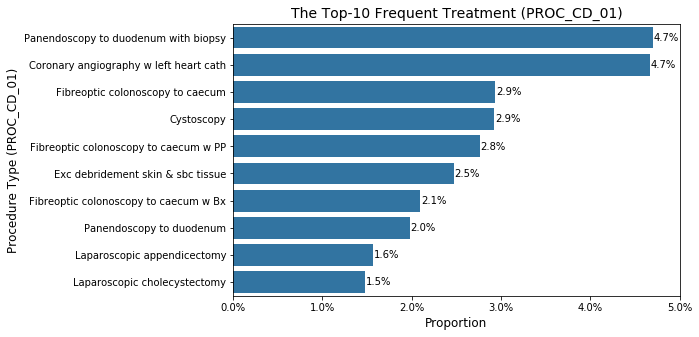

In [19]:
# set the preliminary parameters for the plot
treatment_count = treatment_name.ASCII_SHORT_DESC.value_counts()
treatment_order = treatment_count.index
treatment_total = treatment_name.shape[0]
treatment_max = treatment_count[0]
treatment_max_prop = treatment_max / treatment_total

# set the ticks for the plot
tick_props = np.arange(0, treatment_max_prop+0.01, 0.01)
tick_names = ['{:0.1f}%'.format(v*100) for v in tick_props]

# creat the bar chart for the top 20 cancer
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
top_10_treatment_order = treatment_order[0:10]

sns.countplot(data=treatment_name, y='ASCII_SHORT_DESC', color=base_color, order=top_10_treatment_order)
plt.xticks(tick_props*treatment_total, tick_names)
plt.title('The Top-10 Frequent Treatment (PROC_CD_01)', fontsize=14)
plt.xlabel('Proportion', fontsize=12)
plt.ylabel('Procedure Type (PROC_CD_01)', fontsize=12);

# add percentage text to each cancer
for i in range(10):
    count = treatment_count[i]
    pct_string = '{:0.1f}%'.format(count*100/treatment_total)
    plt.text(count+5, i, pct_string, va='center')

plt.show()

From the figure above, the top-2 frequent treatments are `Panendoscopy to duodenum with biopsy` and `Coronary angiography w left heart cath`, both of them as twice as the third and fourth ones. After `Nasendoscopy`, the proportion remains nearly the same. 

Comparing these two graphs, we can find that the treatment does not perfectly correspond to the diagnosis result.

### 2.5 Proportion of `CARE_TYP`,	`ADM_TYP`, and `ADM_SRC`
Let's look at the proportion of `CARE_TYP`,	`ADM_TYP`, and `ADM_SRC`.

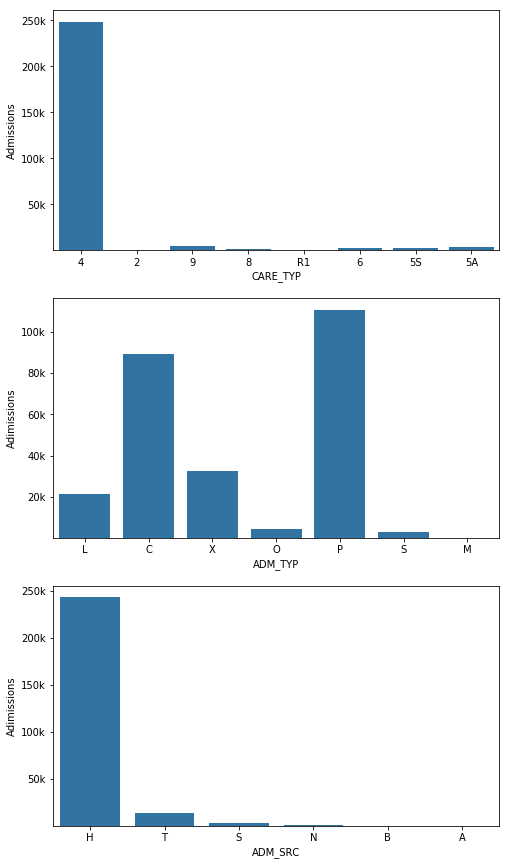

In [20]:
# create the plot of 'CARE_TYP', 'ADM_TYP', and 'ADM_SRC'
plt.figure(figsize=[8, 15])
plt.subplot(3, 1, 1)
base_color = sns.color_palette()[0]
sns.countplot(data=epis, x='CARE_TYP', color=base_color)
plt.yticks([5e4, 10e4, 15e4, 20e4, 25e4], ['50k', '100k', '150k', '200k', '250k'])
plt.ylabel('Admissions')

plt.subplot(3, 1, 2)
sns.countplot(data=epis, x='ADM_TYP', color=base_color)
plt.yticks([2e4, 4e4, 6e4, 8e4, 10e4], ['20k', '40k', '60k', '80k', '100k'])
plt.ylabel('Adimissions')

plt.subplot(3, 1, 3)
sns.countplot(data=epis, x='ADM_SRC', color=base_color)
plt.yticks([5e4, 10e4, 15e4, 20e4, 25e4], ['50k', '100k', '150k', '200k', '250k'])
plt.ylabel('Adimissions');

The most prevalent `CARE_TYP` is `4`, far outnumbering the other care types. `C` and `P` account for the two largest proportion in `ADM_TYP`, while `H` accounts for the largest proportion in `ADM_SRC`. 

### 2.6 The Proportion of Birth Year
It seems valuable to discover the proportion of the birth year of the patient. In order to do this, we need to categorize different years into one decade. We will create a DataFrame named `patient_2` for our analysis.

In [21]:
# create a dataframe called 'patient_2'
patient_2 = epis[['USI', 'DATE_OF_BIRTH']]
patient_2.drop_duplicates(inplace=True)
patient_2.reset_index(drop=True, inplace=True)
patient_2['YEAR_OF_BIRTH'] = patient_2.DATE_OF_BIRTH.str[:4]
patient_2.YEAR_OF_BIRTH = patient_2.YEAR_OF_BIRTH.astype(int)
patient_2.head()

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,USI,DATE_OF_BIRTH,YEAR_OF_BIRTH
0,98,1962-04-07,1962
1,112,1939-03-08,1939
2,131,1948-10-20,1948
3,156,1951-05-01,1951
4,159,1954-01-15,1954


/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


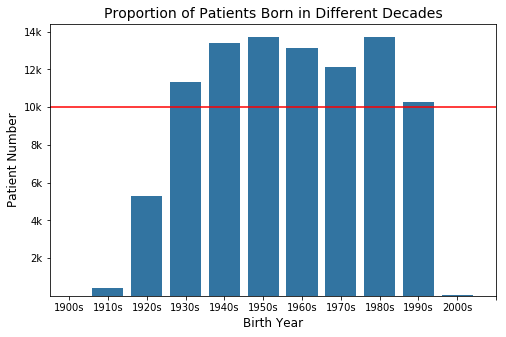

In [22]:
# bins years into decades
bins = np.arange(1900, 2010+10, 10)
patient_2['BIRTH_OF_DECADE'] = pd.cut(patient_2.YEAR_OF_BIRTH, bins, right=False, include_lowest=True)

# create the plot of decades
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(data=patient_2, x='BIRTH_OF_DECADE', color=base_color)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
           ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s'])
plt.yticks([2e3, 4e3, 6e3, 8e3, 10e3, 12e3, 14e3], ['2k', '4k', '6k', '8k', '10k', '12k', '14k'])
plt.xlabel('Birth Year', fontsize=12)
plt.ylabel('Patient Number', fontsize=12)
plt.axhline(y=10e3, color='r')
plt.title('Proportion of Patients Born in Different Decades', fontsize=14);

The birth year of the largest proportion of patients concentrates from 1920 to 2000, with all of the number over 10k and 1980s accounting for the largest proportion. There is a concern that people born in 1980s accounts for the highest proportion, indicating the occurrence of cancer trends to be in young people.

### 2.7 Insights in Univariate Exploration
- The number of male patients slightly outnumbers the female ones.
- There is a increasing trend in both patient numbers and admissions over the year.
- The most frequent cancer is `Chest pain unspecified`, while the two most frequent treatment are `Panendoscopy to duodenum with biopsy` and `Coronary angiography w left heart cath`. The treatment does not exactly correspond to the diagnosis.
- The most frequent care type and admission source are `4` and `H` respectively, far outnumbering the remaining numbers. The most two frequent admission types are `C` and `P`.
- People born from 1920 to 2000 account for the main proportion of cancer patients. The occurrence of cancer has a trend within young people.

## 3. Bivariate Exploration
### 3.1 `SEX` in `FIS_YEAR` Trend
Let's now combine `SEX` and `FIS_YEAR` to discover how the number of patients in different genders and their admissions changed over the year.

In [23]:
# create a dataframe called 'patient_fis'
patient_fis_2 = diag[['USI', 'FIS_YEAR', 'SEX']]
patient_fis_2.drop_duplicates(inplace=True)
patient_fis_2.reset_index(drop=True, inplace=True)

# create a dataframe called 'adm_fis'
adm_fis_2 = diag[['UNIQUE_KEY', 'FIS_YEAR', 'SEX']]
adm_fis_2.drop_duplicates(inplace=True)
adm_fis_2.reset_index(drop=True, inplace=True)

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


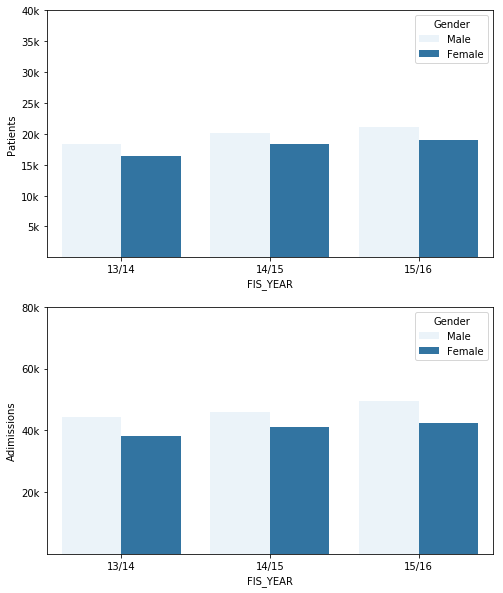

In [24]:
# create the plot of 'FIS_YEAR' for different genders
plt.figure(figsize=[8, 10])
plt.subplot(2, 1, 1)
base_color = sns.color_palette()[0]
sns.countplot(data=patient_fis_2, x='FIS_YEAR', color=base_color, hue='SEX')
plt.yticks([5e3, 1e4, 1.5e4, 2e4, 2.5e4, 3e4, 3.5e4, 4e4], ['5k', '10k', '15k', '20k', '25k', '30k', '35k', '40k'])
plt.ylabel('Patients')
plt.legend(['Male', 'Female'], title='Gender')

plt.subplot(2, 1, 2)
sns.countplot(data=adm_fis_2, x='FIS_YEAR', color=base_color, hue='SEX')
plt.yticks([2e4, 4e4, 6e4, 8e4], ['20k', '40k', '60k', '80k'])
plt.ylabel('Adimissions')
plt.legend(['Male', 'Female'], title='Gender');

It seems that the proportion of genders does not change over the year.
### 3.2 `SEX` in Birth Year

In [25]:
# create a dataframe called 'patient_2'
patient_3 = epis[['USI', 'DATE_OF_BIRTH', 'SEX']]
patient_3.drop_duplicates(inplace=True)
patient_3.reset_index(drop=True, inplace=True)
patient_3['YEAR_OF_BIRTH'] = patient_3.DATE_OF_BIRTH.str[:4]
patient_3.YEAR_OF_BIRTH = patient_3.YEAR_OF_BIRTH.astype(int)
patient_3.head()

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,USI,DATE_OF_BIRTH,SEX,YEAR_OF_BIRTH
0,98,1962-04-07,2,1962
1,112,1939-03-08,2,1939
2,131,1948-10-20,2,1948
3,156,1951-05-01,2,1951
4,159,1954-01-15,2,1954


/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


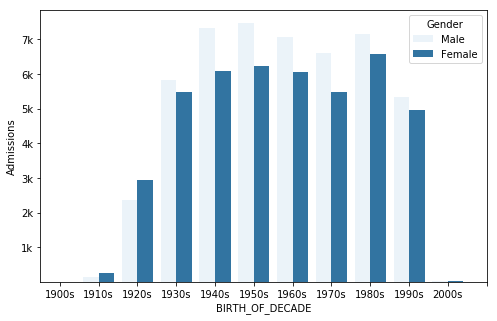

In [26]:
# bins years into decades
bins = np.arange(1900, 2010+10, 10)
patient_3['BIRTH_OF_DECADE'] = pd.cut(patient_3.YEAR_OF_BIRTH, bins, right=False, include_lowest=True)

# create the plot of decades
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(data=patient_3, x='BIRTH_OF_DECADE', color=base_color, hue='SEX')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
           ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s'])
plt.yticks([1e3, 2e3, 3e3, 4e3, 5e3, 6e3, 7e3], ['1k', '2k', '3k', '4k', '5k', '6k', '7k'])
plt.ylabel('Admissions')
plt.legend(['Male', 'Female'], title='Gender');

Overall, male patients outnumber female patients, with the difference slightly changing.

### 3.3 Admission Distribution for Each Patient
Now let's discover the pattern of how many times each patient was admitted to the hospital.

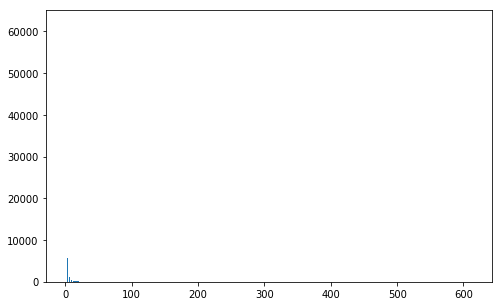

In [27]:
# plot the admission distribution for each patient
bins = np.arange(0.5, 612.5+1, 1)
adm_num = diag[['USI', 'UNIQUE_KEY']].drop_duplicates()
adm_num = adm_num.groupby('USI').count()
plt.figure(figsize=[8, 5])
plt.hist(data=adm_num, x='UNIQUE_KEY', bins=bins, rwidth= .7);

It seems that there are some anormalies in the dataset, so we set the limit of the x-axis.

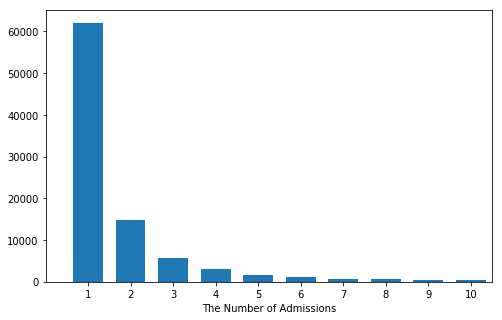

In [28]:
bins = np.arange(0.5, 612.5+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data=adm_num, x='UNIQUE_KEY', bins=bins, rwidth= .7);
plt.xlim(0, 10.5)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('The Number of Admissions');

It is obvious that more than 60,000 patients were admitted to the hospital once and about 15,000 patients are admitted to the hospital twice. The distribution of admission is represented as a high right-skewness distribution.

### 3.4 The Distribution of Cancer Type Complexity

In order to compare the complexity of each cancer type, we need first to think of how to define the complexity. In this question, we assume that the complexity can be measured by the average number of diagnosis stages for each cancer in `DIAG_CD_01`. That means if the one patient has more diagnostic stages in average, the cancer from which he or she suffers has more complexity than others. Therefore, we will use an adapted bar chart to illustrate the comparison of complexity, with the x-axis representing cancer type in `DIAG_CD_01` while y-axis representing the complexity (the mean of diagnosis stages).

In [29]:
# extract the cancer type in `DIAG_CD_1` as primary cancer
pri_cancer = diag.query('DIAG_STAGE == 1')[['UNIQUE_KEY', 'DIAG_CD']]
pri_cancer.DIAG_CD = pri_cancer.DIAG_CD.str[2:]
pri_cancer = pri_cancer.merge(diag_map, on='DIAG_CD')
pri_cancer.rename(columns={'DIAG_CD': 'PRI_CODE', 'ASCII_SHORT_DESC': 'PRI_NAME'}, inplace=True)
pri_cancer.head()

,UNIQUE_KEY,PRI_CODE,PRI_NAME
0,6447017,F445,Dissociative convulsions
1,6397543,F445,Dissociative convulsions
2,6535983,F445,Dissociative convulsions
3,6396856,F445,Dissociative convulsions
4,6542957,F445,Dissociative convulsions


In [30]:
# merge the two tables together
pri_cancer = pri_cancer.merge(diag, on='UNIQUE_KEY')
pri_cancer.head()

,UNIQUE_KEY,PRI_CODE,PRI_NAME,USI,SEX,FIS_YEAR,DIAG_STAGE,DIAG_CD
0,6447017,F445,Dissociative convulsions,98,2,13/14,1,PF445
1,6447017,F445,Dissociative convulsions,98,2,13/14,2,PF209
2,6447017,F445,Dissociative convulsions,98,2,13/14,3,PE119
3,6397543,F445,Dissociative convulsions,13390,2,13/14,1,PF445
4,6397543,F445,Dissociative convulsions,13390,2,13/14,2,PS299


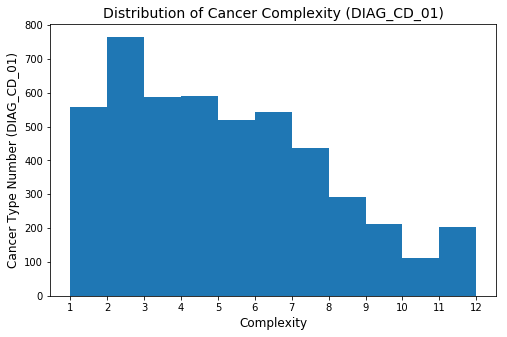

In [31]:
# calculate the cancer type complexity
diag_stage_num = pri_cancer.groupby(['PRI_NAME']).count().USI
cancer_freq = pri_cancer[['UNIQUE_KEY', 'PRI_NAME']].drop_duplicates().groupby(['PRI_NAME']).count().UNIQUE_KEY
cancer_com = diag_stage_num / cancer_freq
cancer_ord = cancer_com.sort_values(ascending=False)
cancer_ord = pd.DataFrame({'PRI_CODE': cancer_ord.index, 'Complexity':cancer_ord.values})

# creat the distribution for the cancer type complexity
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]

bins = np.arange(1, 12+1, 1)

plt.hist(data=cancer_ord, x='Complexity', bins=bins)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.xlabel('Complexity', fontsize=12)
plt.ylabel('Cancer Type Number (DIAG_CD_01)', fontsize=12)
plt.title('Distribution of Cancer Complexity (DIAG_CD_01)', fontsize=14);

The graph shows that the cancer with the complexity of 2-3 accounts for the largest proportion. For complexity higher than 3, the proportion decreases and slightly increases in complexity of 11-12. 

### 3.5 Insights in Bivariate Exploration
- The difference in patient genders for both remains nearly the same over the year.
- For patients born before 1930, the female patient outnumbers the male patient, while for patients born after 1930, the male patient outnumbers the female patient
- More than 60,000 patients were admitted to the hospital once and about 15,000 patients are admitted to the hospital twice.
- The cancer with the complexity of 2-3 accounts for the largest proportion. For complexity higher than 3, the proportion decreases and slightly increases in complexity of 11-12.

## 4. Conclusion
This report utilizes univariate and bivariate exploration for `diag_clean`, `proc_clean`, and `epis_clean` datasets. Some descriptive insights are discovered from the visualization process. Here are some recommendations for further cancer research based on this dataset:
- There are an increasing trend of cancer diagnosis over the year, and a large proportion of young people suffer from cancer. Thus, the reason for this cancer trend should be discovered in order to help with the prevention.
- The cancer type of `Chest pain unspecified` is the most prevalent one among population. Researchers are suggested to put weight on this cancer type.
- There are nearly 200 types of the cancer with the complexity of 11-12 within the dataset. These types should be focused on because these types are easily to evolve into other cancer types or forms in morphology.